In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fourvec import *


import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib.pyplot import *
from matplotlib.legend_handler import HandlerLine2D


In [2]:
m4=0.150
mzprime=0.030
df_dark_l2 = pd.read_pickle(f'../data/nd280_nu/3plus1/m4_{m4}_mzprime_{mzprime}/MC_m4_{m4}_mzprime_{mzprime}.pckl')
mzprime=1.25
df_dark_h2 = pd.read_pickle(f'../data/nd280_nu/3plus1/m4_{m4}_mzprime_{mzprime}/MC_m4_{m4}_mzprime_{mzprime}.pckl')
df_std = pd.read_pickle(f'data/MC_m4_{m4}_mzprime_{mzprime}.pckl')

In [3]:
print(len(df_dark_l2))
print(len(df_dark_h2))
print(len(df_std))

380973
338492
10333


In [4]:
# compute useful variables
for df in [df_dark_l2,df_dark_h2,df_std]:
    for comp in ['t','x','y','z']:
        df['pee', comp] = df['plm', comp] + df['plp', comp]
        df['pdark', comp] = df['plm', comp] + df['plp', comp] + df['pnu', comp]
    df['recoil_mass', ''] = inv_mass(df['pHad']).round(6)
    df['ee_mass', ''] = inv_mass(df['pee'])
    df['ee_costheta', ''] = costheta(df['plm'], df['plp'])
    df['ee_beam_costheta', ''] = df['pee', 'z']/np.sqrt(dot3_df(df['pee'], df['pee']))
    df['ee_momentum', ''] = np.sqrt(dot3_df(df['pee'], df['pee']))
    df['experimental_t', ''] = (df['plm','t'] - df['plm','z'] + df['plp','t'] - df['plp','z'])**2 +\
                                   df['plm','x']**2 + df['plm','y']**2 + df['plp','x']**2 + df['plp','y']**2

In [5]:
total_pot = 2e21

tpc_length = 100 #cm
fgd_length = 36.5 #cm
p0d_length = 240 #cm

p0d_dimensions = [210.3, 223.9, 240]
detector_splitting = {0: [0, 30.5],
                      1: [30.5, 209.6],
                      2: [209.6, 240.0]}

mol2natoms = 6.02214e23 # Avogadro's number
ton2grams = 1e6
geometry_material = {
    'hydrogen': [0, 1, 2],
    'oxygen': [1],
    'carbon': [0, 1, 2],
    'copper': [1],
    'zinc': [1],
    'lead': [0, 2],
}

material_dict = {
    0.9385: 'hydrogen',
    11.262: 'carbon',
    15.016: 'oxygen',
    59.637921: 'copper',
    61.35913: 'zinc',
    194.4572: 'lead'
}

gev_mass = dict(zip(material_dict.values(), material_dict.keys()))

molar_mass = {
    'hydrogen': 1.00784,
    'carbon': 12.0107,
    'oxygen': 15.999,
    'copper': 63.546,
    'zinc': 65.38,
    'lead': 207.2
}

mass_material = {
    'hydrogen': 3.3*2*molar_mass['hydrogen']/(2*molar_mass['hydrogen'] + molar_mass['oxygen']),
    'oxygen': 3.3*molar_mass['oxygen']/(2*molar_mass['hydrogen'] + molar_mass['oxygen']),
    'carbon': 8.221,
    'copper': 1.315*0.66, # percentage of copper in typical brass
    'zinc': 1.315*0.34, # percentage of zinc in typical brass
    'lead': 3.634,
}

for df in [df_dark_l2,df_dark_h2]:
    ntarget_material = {}
    for material, mass in mass_material.items():
        ntarget_material[material] = mass*ton2grams/molar_mass[material]*mol2natoms

        material_mask = (df['recoil_mass'] == gev_mass[material])
        df.loc[material_mask, ('actual_weight', '')] = df['weight', ''][material_mask] * ntarget_material[material] * total_pot


Text(0, 0.5, 'a.u.')

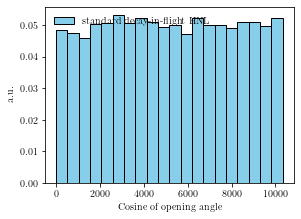

In [16]:
fsize = 10
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1.2*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(params)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)

out = ax.hist(df_std['ee_costheta', ''].index, 
               bins=20, 
#                range=(0.5, 1),
               weights=wstd, 
               label='standard decay-in-flight HNL',
                facecolor='skyblue',
              edgecolor='black',
               histtype='bar')

# out = ax.hist(df_dark_l2['ee_costheta', ''], 
#                bins=20, 
#                range=(0.5, 1),
#                weights=wdark_l2, 
#                label=r'dark HNL ($m_{Z^\prime} = 30$~MeV)',
#                lw=1.0,
#                edgecolor='red',
#                histtype='step')

# out = ax.hist(df_dark_h2['ee_costheta', ''], 
#                bins=20, 
#                range=(0.5, 1),
#                weights=wdark_h2, 
#                label=r'dark HNL ($m_{Z^\prime} = 1.25$~GeV)',
#                lw=1.0,
#                edgecolor='red',
#               ls='--',
#                histtype='step')


ax.legend(loc='upper left',frameon=False)
ax.set_xlabel(r"Cosine of opening angle")
ax.set_ylabel(r"a.u.")
# ax.set_xlim(0.5,1.0)
# ax.set_title(r"$m_4 = 150$ MeV -- all inclusive",fontsize=fsize)
# plt.savefig("cos_opening_angle.pdf")

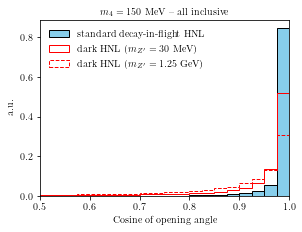

In [8]:
wdark_h2=df_dark_h2['weight', '']/np.sum(df_dark_h2['weight', ''])
wdark_l2=df_dark_l2['weight', '']/np.sum(df_dark_l2['weight', ''])
wstd=df_std['weight', '']/np.sum(df_std['weight', ''])




fsize = 10
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1.2*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(params)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)

out = ax.hist(df_std['ee_costheta', ''], 
               bins=20, 
               range=(0.5, 1),
               weights=wstd, 
               label='standard decay-in-flight HNL',
                facecolor='skyblue',
              edgecolor='black',
               histtype='bar')

out = ax.hist(df_dark_l2['ee_costheta', ''], 
               bins=20, 
               range=(0.5, 1),
               weights=wdark_l2, 
               label=r'dark HNL ($m_{Z^\prime} = 30$~MeV)',
               lw=1.0,
               edgecolor='red',
               histtype='step')

out = ax.hist(df_dark_h2['ee_costheta', ''], 
               bins=20, 
               range=(0.5, 1),
               weights=wdark_h2, 
               label=r'dark HNL ($m_{Z^\prime} = 1.25$~GeV)',
               lw=1.0,
               edgecolor='red',
              ls='--',
               histtype='step')



ax.legend(loc='upper left',frameon=False)
ax.set_xlabel(r"Cosine of opening angle")
ax.set_ylabel(r"a.u.")
ax.set_xlim(0.5,1.0)
ax.set_title(r"$m_4 = 150$ MeV -- all inclusive",fontsize=fsize)
plt.savefig("cos_opening_angle.pdf")

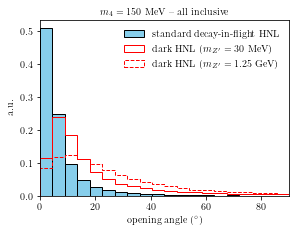

In [157]:

fsize = 10
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1.2*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(params)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)

out = ax.hist(np.arccos(df_std['ee_costheta', ''])*180/np.pi, 
               bins=20, 
               range=(0.0, 90),
               weights=wstd, 
               label='standard decay-in-flight HNL',
                facecolor='skyblue',
              edgecolor='black',
               histtype='bar')

out = ax.hist(np.arccos(df_dark_l2['ee_costheta', ''])*180/np.pi, 
               bins=20, 
               range=(0., 90),
               weights=wdark_l2, 
               label=r'dark HNL ($m_{Z^\prime} = 30$~MeV)',
               lw=1.0,
               edgecolor='red',
               histtype='step')

out = ax.hist(np.arccos(df_dark_h2['ee_costheta', ''])*180/np.pi, 
               bins=20, 
               range=(0.0, 90),
               weights=wdark_h2, 
               label=r'dark HNL ($m_{Z^\prime} = 1.25$~GeV)',
               lw=1.0,
               edgecolor='red',
              ls='--',
               histtype='step')

ax.legend(loc='upper right',frameon=False)
ax.set_xlabel(r"opening angle ($^\circ$)")
ax.set_ylabel(r"a.u.")
ax.set_xlim(0.,90.0)
ax.set_title(r"$m_4 = 150$ MeV -- all inclusive",fontsize=fsize)
plt.savefig("opening_angle.pdf")

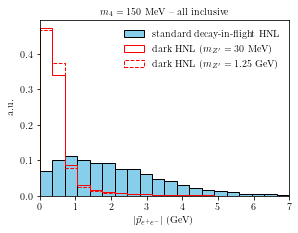

In [166]:

fsize = 10
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1.2*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(params)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)

EMAX=7.0
out = ax.hist(df_std['ee_momentum', ''], 
               bins=20, 
               range=(0.0, EMAX),
               weights=wstd, 
               label='standard decay-in-flight HNL',
                facecolor='skyblue',
              edgecolor='black',
               histtype='bar')

out = ax.hist(df_dark_l2['ee_momentum', ''], 
               bins=20, 
               range=(0., EMAX),
               weights=wdark_l2, 
               label=r'dark HNL ($m_{Z^\prime} = 30$~MeV)',
               lw=1.0,
               edgecolor='red',
               histtype='step')

out = ax.hist(df_dark_h2['ee_momentum', ''], 
               bins=20, 
               range=(0.0, EMAX),
               weights=wdark_h2, 
               label=r'dark HNL ($m_{Z^\prime} = 1.25$~GeV)',
               lw=1.0,
               edgecolor='red',
              ls='--',
               histtype='step')

ax.legend(loc='upper right',frameon=False)
ax.set_xlabel(r"$|\vec{p}_{e^+e^-}|$ (GeV)")
ax.set_ylabel(r"a.u.")
ax.set_xlim(0.,EMAX)
ax.set_title(r"$m_4 = 150$ MeV -- all inclusive",fontsize=fsize)
plt.savefig("energy.pdf")

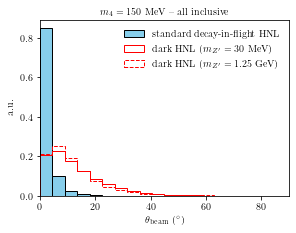

In [192]:

fsize = 10
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1.2*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(params)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)

EMAX=90
out = ax.hist(np.arccos(df_std['ee_beam_costheta', ''])*180/np.pi, 
               bins=20, 
               range=(0.0, EMAX),
               weights=wstd, 
               label='standard decay-in-flight HNL',
                facecolor='skyblue',
              edgecolor='black',
               histtype='bar')

out = ax.hist(np.arccos(df_dark_l2['ee_beam_costheta', ''])*180/np.pi, 
               bins=20, 
               range=(0., EMAX),
               weights=wdark_l2, 
               label=r'dark HNL ($m_{Z^\prime} = 30$~MeV)',
               lw=1.0,
               edgecolor='red',
               histtype='step')

out = ax.hist(np.arccos(df_dark_h2['ee_beam_costheta', ''])*180/np.pi, 
               bins=20, 
               range=(0.0, EMAX),
               weights=wdark_h2, 
               label=r'dark HNL ($m_{Z^\prime} = 1.25$~GeV)',
               lw=1.0,
               edgecolor='red',
              ls='--',
               histtype='step')

ax.legend(loc='upper right',frameon=False)
ax.set_xlabel(r"$\theta_{\rm beam}$ ($^\circ$)")
ax.set_ylabel(r"a.u.")
ax.set_xlim(0.,EMAX)
ax.set_title(r"$m_4 = 150$ MeV -- all inclusive",fontsize=fsize)
plt.savefig("beam_angle.pdf")

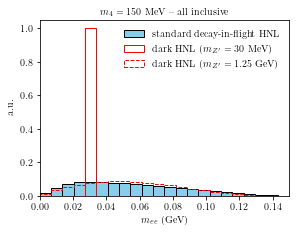

In [193]:

fsize = 10
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1.2*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
rcParams.update(params)
axes_form  = [0.15,0.15,0.78,0.74]
fig = plt.figure()
ax = fig.add_axes(axes_form)

EMAX=0.150
out = ax.hist((df_std['ee_mass', '']), 
               bins=22, 
               range=(0.0, EMAX),
               weights=wstd, 
               label='standard decay-in-flight HNL',
                facecolor='skyblue',
              edgecolor='black',
               histtype='bar')

out = ax.hist((df_dark_l2['ee_mass', '']), 
               bins=22, 
               range=(0., EMAX),
               weights=wdark_l2, 
               label=r'dark HNL ($m_{Z^\prime} = 30$~MeV)',
               lw=1.0,
               edgecolor='red',
               histtype='step')

out = ax.hist((df_dark_h2['ee_mass', '']), 
               bins=22, 
               range=(0.0, EMAX),
               weights=wdark_h2, 
               label=r'dark HNL ($m_{Z^\prime} = 1.25$~GeV)',
               lw=1.0,
               edgecolor='red',
              ls='--',
               histtype='step')

ax.legend(loc='upper right',frameon=False)
ax.set_xlabel(r"$m_{ee}$ (GeV)")
ax.set_ylabel(r"a.u.")
ax.set_xlim(0.,EMAX)
ax.set_title(r"$m_4 = 150$ MeV -- all inclusive",fontsize=fsize)
plt.savefig("ee_inv_mass.pdf")

In [ ]:
selection = (df['ee_beam_costheta', ''] > 0.99) &\
            (df['ee_costheta', ''] > 0) &\
            (df['experimental_t', ''] < 0.03) &\
            (df['ee_momentum', ''] > 0.150)

In [7]:
rg = np.random.default_rng()

df['int_point', 't'] = 0
df['int_point', 'x'] = rg.uniform(0, p0d_dimensions[0], len(df))
df['int_point', 'y'] = rg.uniform(0, p0d_dimensions[1], len(df))

for material_mass, material in material_dict.items():
    material_mask = (df['recoil_mass', ''] == material_mass)
    region = rg.choice(geometry_material[material], len(df))

    for splitting, boundaries in detector_splitting.items():
        region_mask = (region == splitting)
        total_mask = material_mask & region_mask
        df.loc[total_mask, ('int_point', 'z')] = rg.uniform(*boundaries, total_mask.sum())

In [9]:
total_selection = selection & df[f'decay_in_tpc_{ctau}']
out = plt.hist(df['pee', 't'][total_selection], 
               bins=20, 
               range=(0, 4),
               weights=df.loc[total_selection, ('actual_weight', '')], 
               label=f"ctau = {ctau} cm, nevt = {df.loc[total_selection, ('actual_weight', '')].sum():.0f}", 
               histtype='step')

plt.legend(frameon=False)
plt.xlabel('e+e- deposited energy [GeV]')
plt.title(f"Best fit point {model}")
plt.savefig(save_folder+"ee_energy.png", dpi=250)

NameError: name 'ctaus' is not defined